In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
%matplotlib inline

In [21]:
data=pd.read_csv('Advertising.csv', index_col=0)
# data.columns=['dh','ds','dj','dhj']     # explicitly giving column names
# data.head()
# data.shape

Visualising the relation between features(TV,radio,Newspaper) and Target(Sales)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

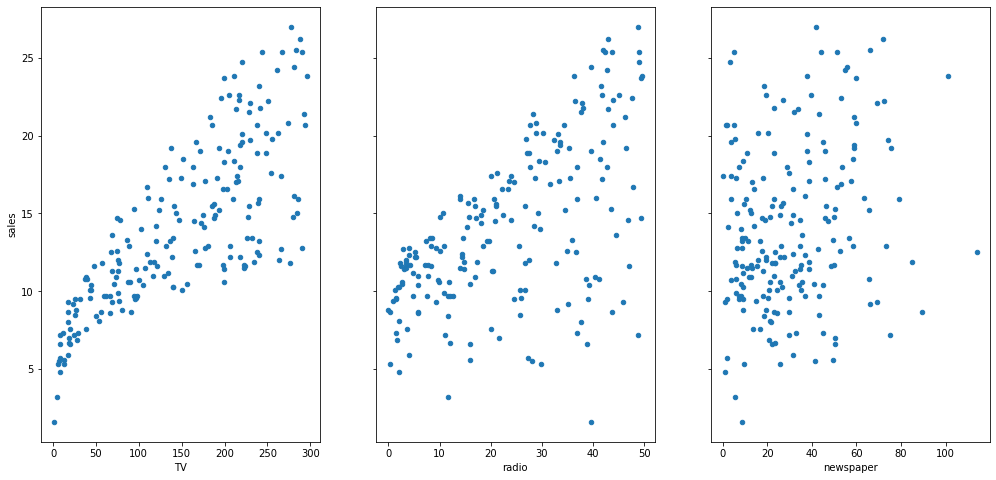

In [12]:
fig,axes=plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='sales',ax=axes[0],figsize=(17,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axes[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axes[2])

Applying Linear Regression to see a realtion between 'TV' ads and 'sales' 

In [13]:
feature_cols=['TV']
x=data[feature_cols]
# y=data['sales']
y=data.sales
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [14]:
# intercept and coefficient od linear model
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


In [15]:
# predicting on a new value
x_new=pd.DataFrame({'TV':[50]})
# x_new.head()
lm.predict(x_new)

array([9.40942557])

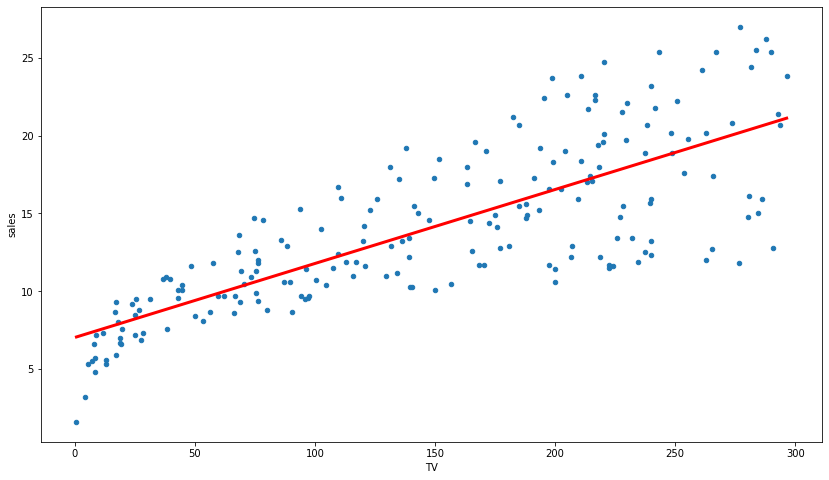

In [16]:
# Plotting the linear regression line
X_new=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
# X_new.head()
preds=lm.predict(X_new)
# preds
data.plot(kind='scatter',x='TV',y='sales',figsize=(14,8))
plt.plot(X_new['TV'],preds,'red',lw=3)

In [17]:
#for predicting model is good or not on the basis of some stats
import statsmodels.formula.api  as smf
lm=smf.ols(formula='sales~TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [18]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [19]:
lm.rsquared

0.611875050850071

### Multiple Linear Regression

In [23]:
feature_cols=['TV','radio','newspaper']
x=data[feature_cols]
y=data.sales
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
lm=LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [25]:
# fitting model on training data
lm=LinearRegression()
lm.fit(xtrain,ytrain)
print(lm.intercept_)
print(lm.coef_)
pred=lm.predict(xtest)   # predicting 'sales' values through model
print(sqrt(mean_squared_error(ytest,pred)))

2.7089490925159065
[0.04405928 0.1992875  0.00688245]
1.9485372043446387


In [26]:
# Now using ols regression result
lm=smf.ols(formula='sales~TV+radio+newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        20:14:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""